In [2]:
"""Preprocessing Neural Spike Data."""

'Preprocessing Neural Spike Data.'

# Output of pipeline for '/neuro/recordings/2018-05-18_14-13-11'

In [1]:
import importlib
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import os

import numpy as np

import nrtk.io
import nrtk.vis
import nrtk.sort
importlib.reload(nrtk.io)
importlib.reload(nrtk.vis)
importlib.reload(nrtk.sort)

import warnings
warnings.filterwarnings("ignore")

OUTPUT_DIR = '/scratch/users/nmiolane/sommet/output'

# Load Data: Positions and signals

In [2]:
data_path = os.path.join(OUTPUT_DIR, 'load_data.npy')
data = np.load(data_path).item()
positions = data['positions']
signals = data['signals']

_, n_time_steps_in_position = positions.shape
_, n_time_steps_in_signal = signals.shape

assert n_time_steps_in_signal == 512 * n_time_steps_in_position

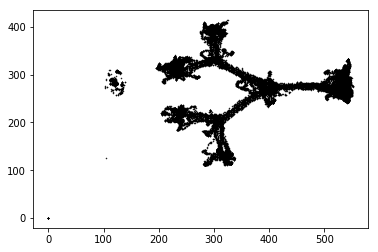

In [3]:
plt.plot(positions[0], positions[1], 'k.', ms=1)
plt.show()

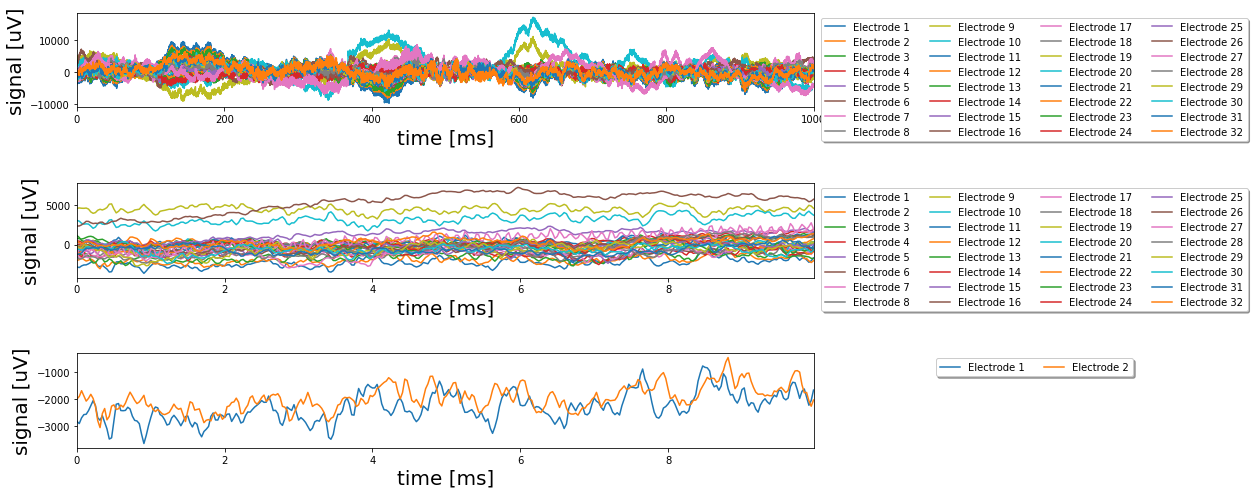

In [4]:
importlib.reload(nrtk.vis)
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(22, 8))
fig.subplots_adjust(hspace=0.8)

ax = axes[0]
ax = nrtk.vis.plot_signal_electrodes(ax, signals)

ax = axes[1]
ax = nrtk.vis.plot_signal_electrodes(ax, signals, t_min=0., t_max=0.01)

ax = axes[2]
ax = nrtk.vis.plot_signal_electrodes(ax, signals, t_min=0., t_max=0.01, electrodes_ids=[0, 1])

# Filter Signals

In [5]:
signals_path = os.path.join(OUTPUT_DIR, 'filter_signals.npy')
signals = np.load(signals_path)

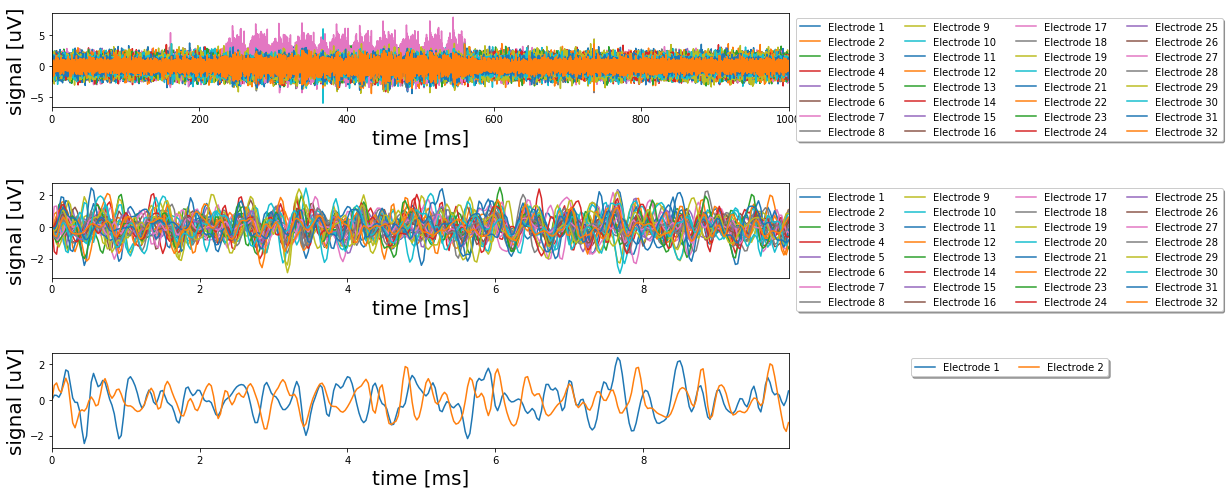

In [6]:
importlib.reload(nrtk.vis)
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(22, 8))
fig.subplots_adjust(hspace=0.8)

ax = axes[0]
ax = nrtk.vis.plot_signal_electrodes(ax, signals)

ax = axes[1]
ax = nrtk.vis.plot_signal_electrodes(ax, signals, t_min=0., t_max=0.01)

ax = axes[2]
ax = nrtk.vis.plot_signal_electrodes(ax, signals, t_min=0., t_max=0.01, electrodes_ids=[0, 1])

## Waterfall view

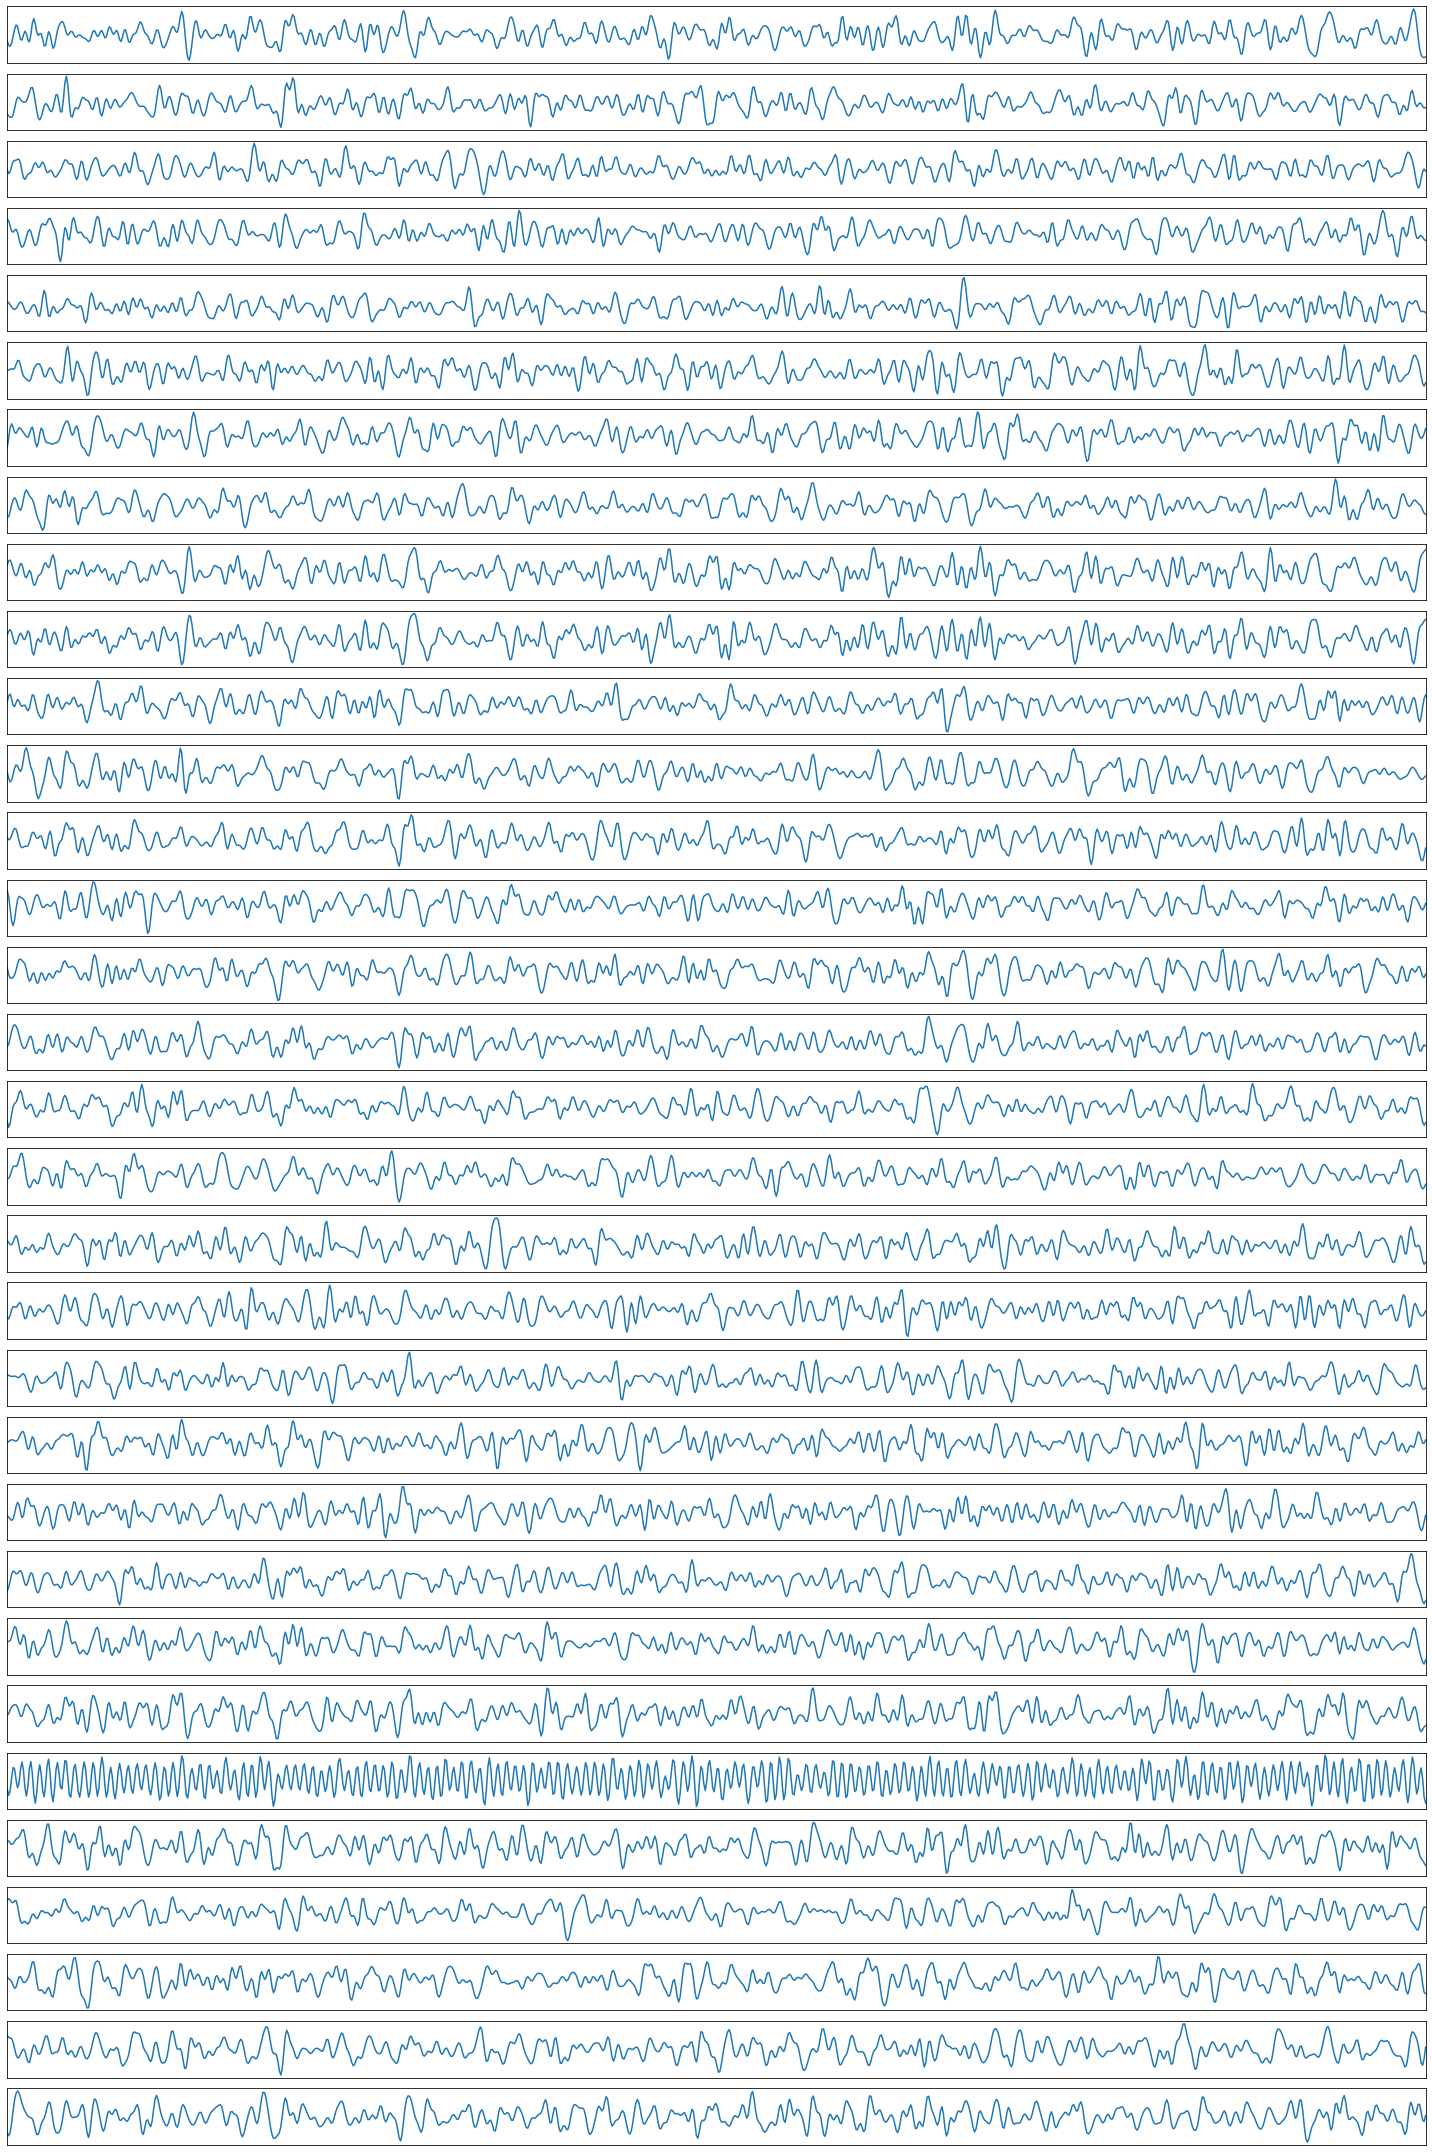

In [7]:
importlib.reload(nrtk.vis)

n_electrodes, _ = signals.shape

fig, axes = plt.subplots(nrows=n_electrodes, ncols=1, figsize=(20, 30))
for i in range(n_electrodes):
    ax = axes[i]
    nrtk.vis.plot_signal(ax, signals[i], label='Electrode %d' % (i+1), t_min=1., t_max=1.03)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.tight_layout()

## Correlations

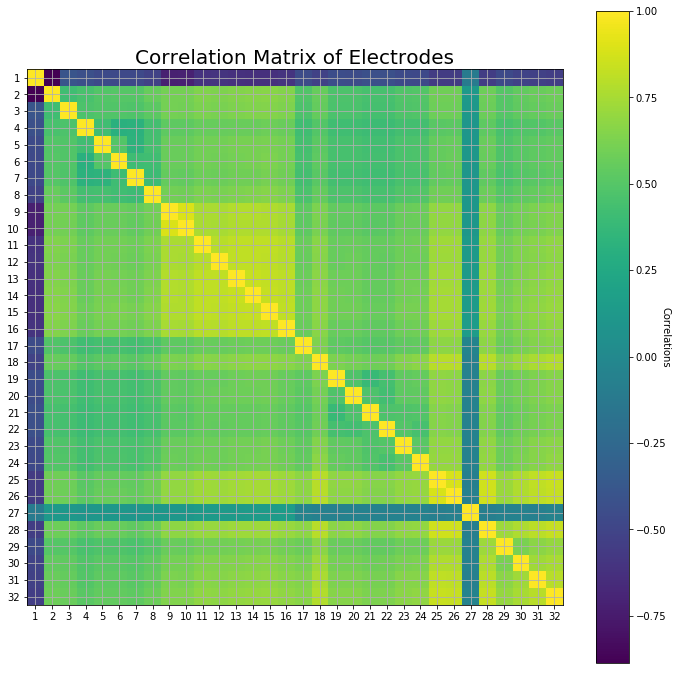

In [8]:
importlib.reload(nrtk.vis)

fig, ax = plt.subplots(figsize=(12, 12))
ax = nrtk.vis.plot_correlation(fig, ax, signals)

# Extract Spikes

## Explore peaks (re-running)

In [9]:
peaks_ids = nrtk.sort.extract_peaks_ids(signals)

Electrode 1. Found 15393 peaks over 27647488 recorded data.
Electrode 2. Found 15604 peaks over 27647488 recorded data.
Electrode 3. Found 20296 peaks over 27647488 recorded data.
Electrode 4. Found 16140 peaks over 27647488 recorded data.
Electrode 5. Found 8797 peaks over 27647488 recorded data.
Electrode 6. Found 8342 peaks over 27647488 recorded data.
Electrode 7. Found 9857 peaks over 27647488 recorded data.
Electrode 8. Found 5030 peaks over 27647488 recorded data.
Electrode 9. Found 2390 peaks over 27647488 recorded data.
Electrode 10. Found 2468 peaks over 27647488 recorded data.
Electrode 11. Found 2442 peaks over 27647488 recorded data.
Electrode 12. Found 2435 peaks over 27647488 recorded data.
Electrode 13. Found 2397 peaks over 27647488 recorded data.
Electrode 14. Found 2241 peaks over 27647488 recorded data.
Electrode 15. Found 2224 peaks over 27647488 recorded data.
Electrode 16. Found 2372 peaks over 27647488 recorded data.
Electrode 17. Found 32798 peaks over 27647488

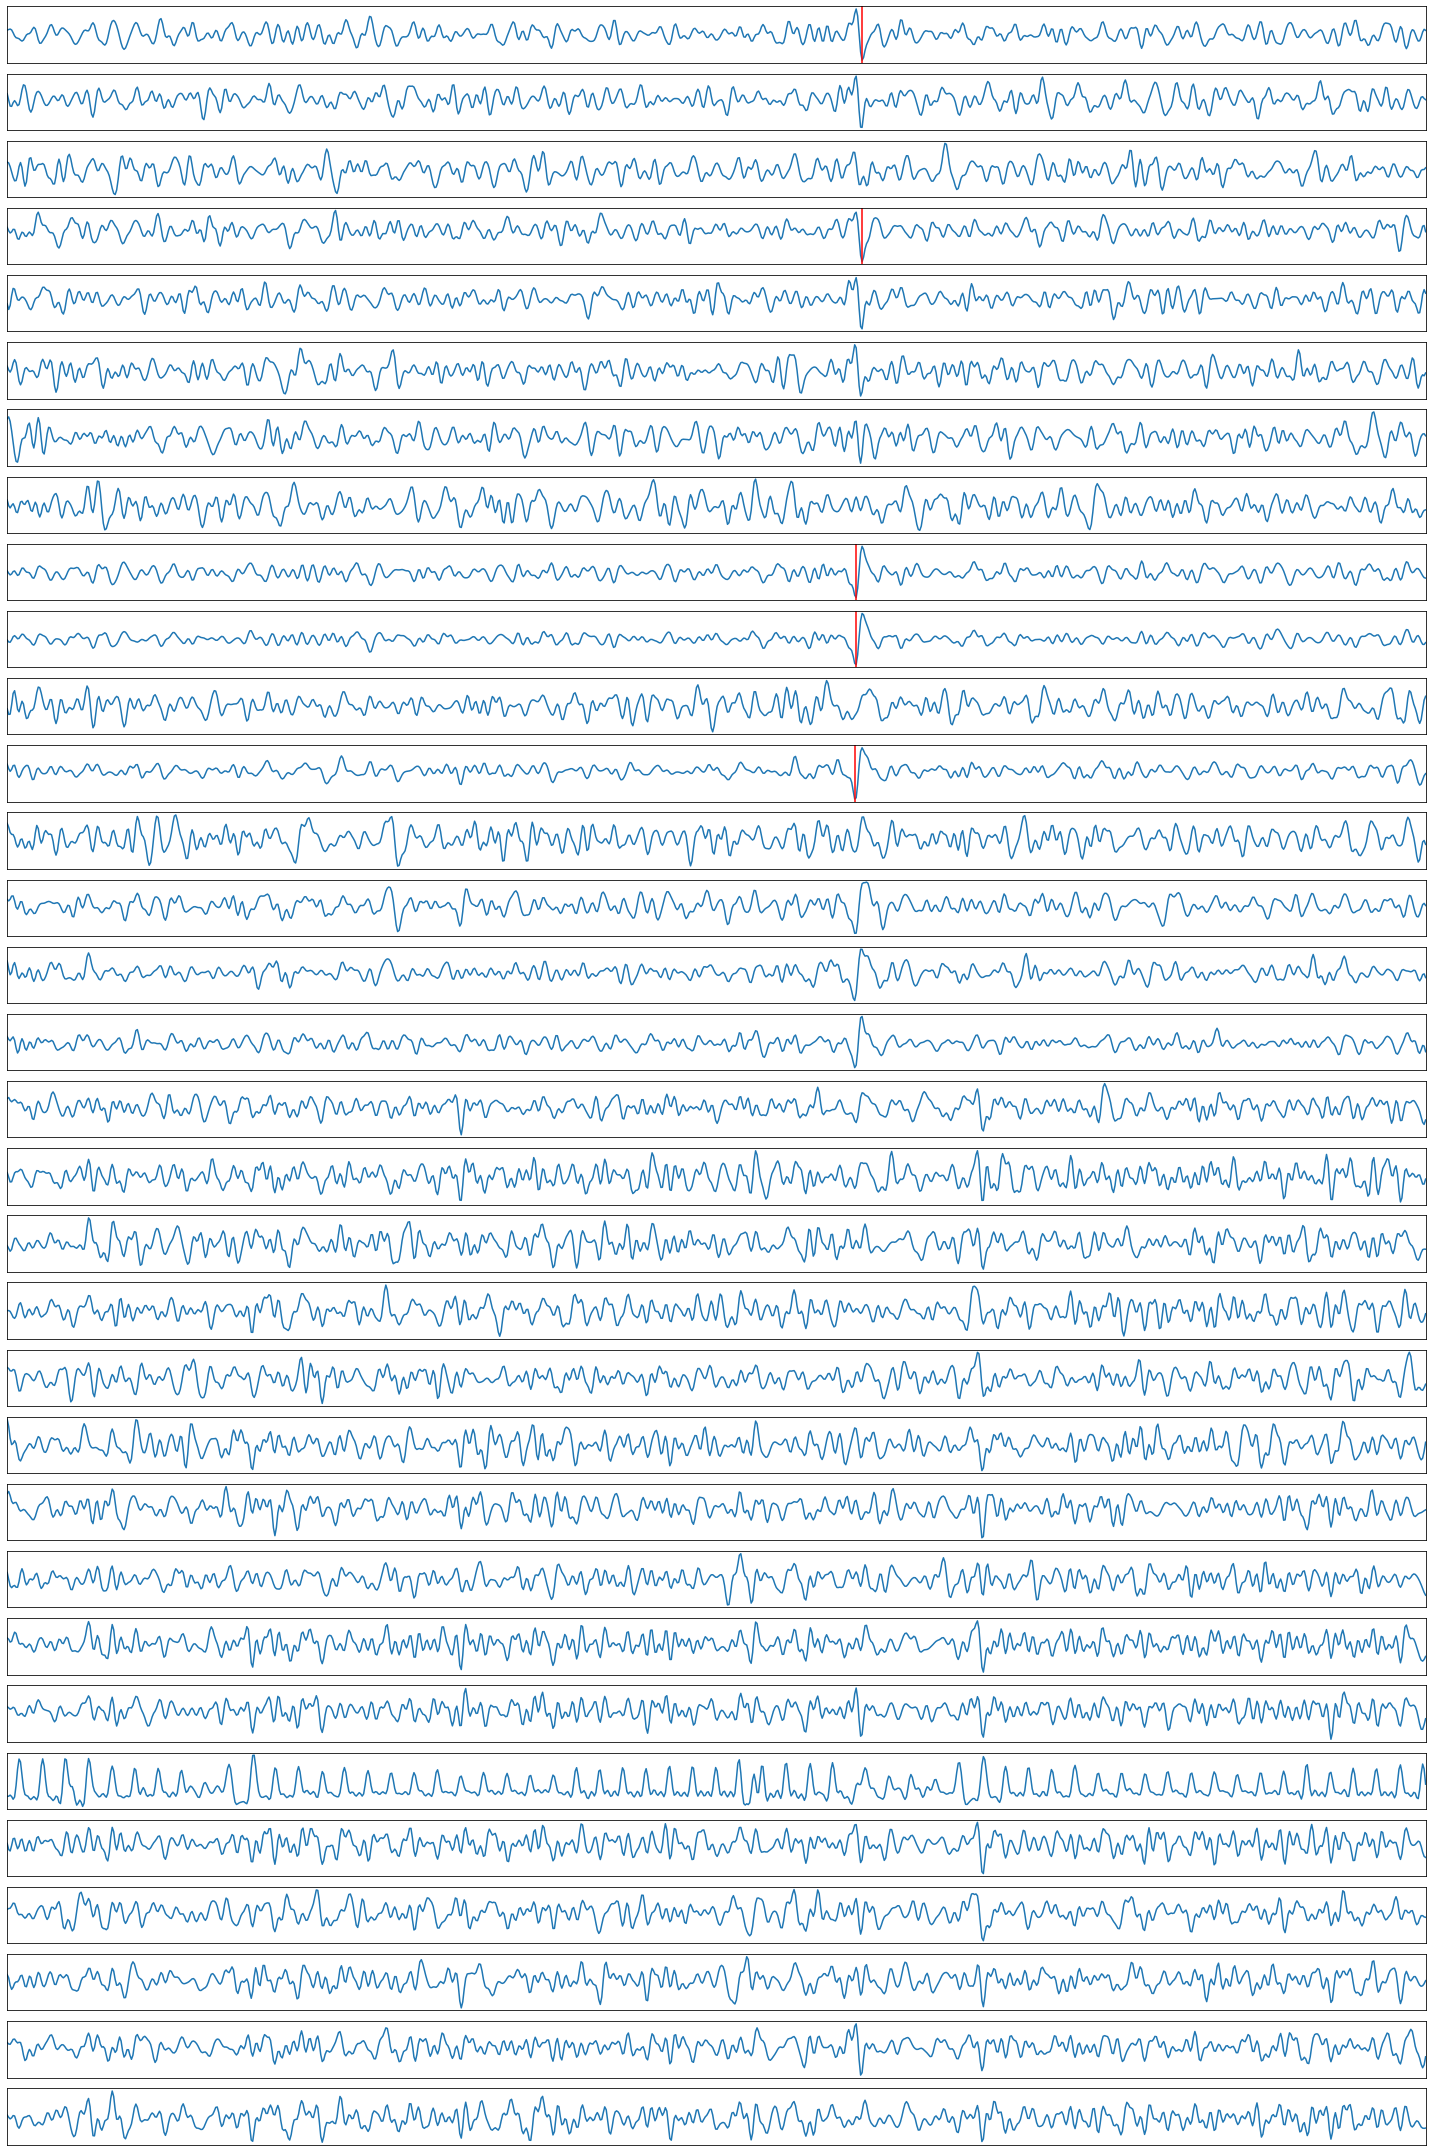

In [15]:
# Extract peaks seem too conservative

importlib.reload(nrtk.vis)

n_electrodes, _ = signals.shape
time = nrtk.vis.get_time(signals)

fig, axes = plt.subplots(nrows=n_electrodes, ncols=1, figsize=(20, 30))
for electrode_id in range(n_electrodes):
    
    ax = axes[electrode_id]
    nrtk.vis.plot_signal(
        ax, signals[electrode_id], label='Electrode %d' % (electrode_id+1), 
        t_min=0.35, t_max=0.38)
    peak_0_msecs = 1000 * time[peaks_ids[electrode_id][0]]
    peak_1_msecs = 1000 * time[peaks_ids[electrode_id][1]]
    ax.axvline(x=peak_0_msecs, color='red')
    ax.axvline(x=peak_1_msecs, color='red')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.tight_layout()

## PCA and KMeans for Spike Sorting

In [19]:
pca_kmeans_path = os.path.join(OUTPUT_DIR, 'extract_spikes.npy')
pca_kmeans = np.load(pca_kmeans_path).item()

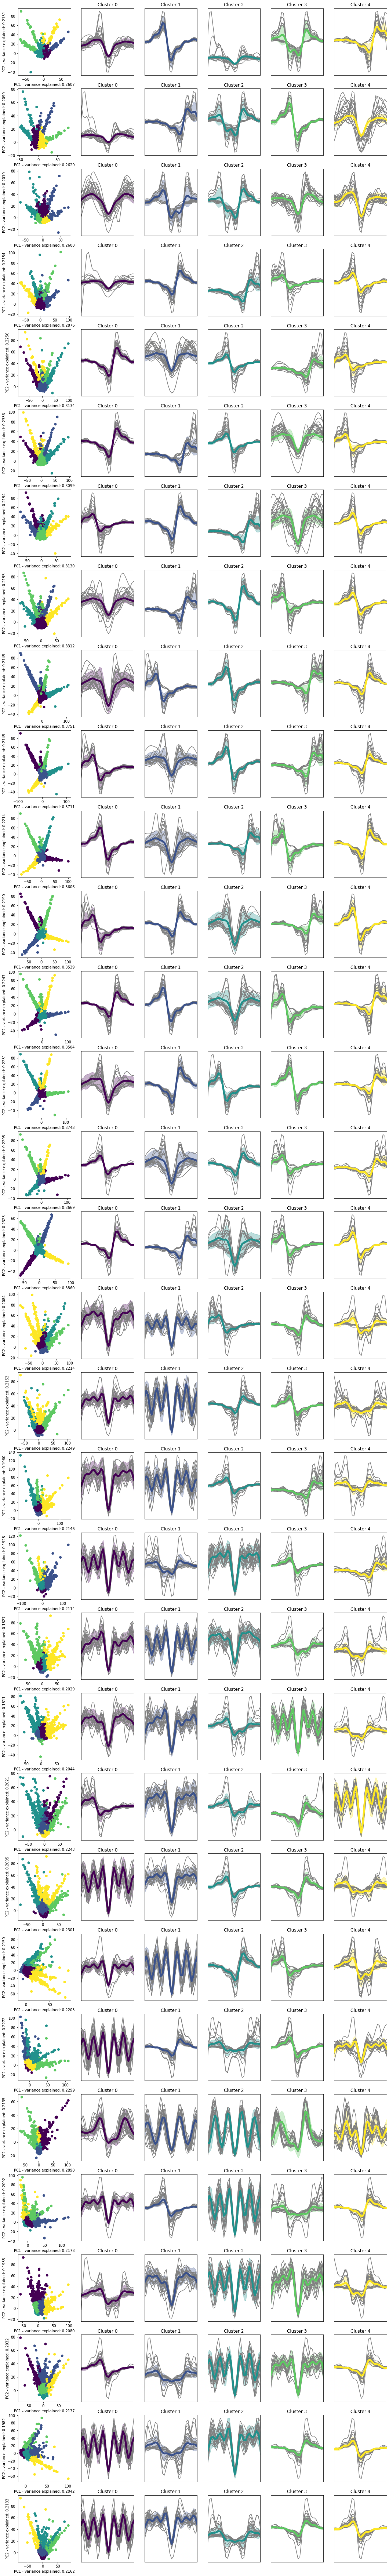

In [21]:
importlib.reload(nrtk.vis)

n_electrodes, _ = signals.shape

fig, axes = plt.subplots(nrows=32, ncols=6, figsize=(18, 4 * n_electrodes))
for electrode_id in range(n_electrodes):
    pca_kmeans_electrode = pca_kmeans[electrode_id]
    n_clusters = len(pca_kmeans_electrode['centers'])
    
    ax = axes[electrode_id, 0]
    ax = nrtk.vis.plot_pca_kmeans(ax, pca_kmeans_electrode)

    for cluster_id in range(n_clusters):
        ax = axes[electrode_id, cluster_id+1]
        ax = nrtk.vis.plot_clusters(ax, pca_kmeans_electrode, cluster_id=cluster_id)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)